# Instructions
<p>Identify 2 Data sets of interest to you. For each, writes a brief description and propose TWO exciting things you might do with them.</p>
<p>Write a brief description. What fields are in the dataset? Do you see any obvious problems with your data?</p>
<p>Three exciting Questions or hypotheses you want to do with them. For each of the questions/hypotheses:
 <ul>
     <li>Describe the basic statistics of data or features that is related to the question.</li>
     <li>Is there existed statistical relationship that can be used to verify the question or hypothesis?</li>
     <li>Implement a linear regression model on the data or features</li>
</ul></p>

<h1 align="center"> Data Set 1 </h1>
<h2> Description: </h2>
<p>This data shows the budget of several movies and their financial records. It shows the cost of production of each movies and the revenue generated domestically in the U.S. and world wide. <br> This data was released May 1st, 2018. </p>

In [38]:
# import important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [39]:
# Display the numbers in 2 decimal places e.g. 3.54
pd.options.display.float_format = '{:,.2f}'.format

<h1 align="center">Questions </h1>

<ol>
    <li>Do higher film budgets lead to more revenue generation i.e. should a studio spend more on a film to make more revenue?</li>
    <li> What impact does the release date (year) has on the revenue generated. Could civilization have played a significant role on the revenue generated.?</li>
</ol>

### Read the data

In [40]:
data_1 = pd.read_csv('movies_cost_revenue.csv')

### What fields are in the dataset

In [41]:
data_1.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

In [42]:
# View the first 5 rows
data_1.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


### Data Cleaning

<p>To work with the numbers in the columns that deals with the cost, we need to remove the $ and , characters</p>

In [43]:
# Replace the , and & sign
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']
for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        data_1[col] = data_1[col].astype(str).str.replace(char,'')
    # Convert column to a numeric data type
    data_1[col] = pd.to_numeric(data_1[col])

/var/folders/7r/xc37grhj1lj37fxjxs4bbc640000gn/T/ipykernel_1659/3812435995.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_1[col] = data_1[col].astype(str).str.replace(char,'')


In [44]:
# Let's check to see if there is any column with NaN values
data_1.isna().values.any()

False

<p>Fortunately, we do not have any NaN value. The data looks great!</p>

In [45]:
# View the new format now
data_1.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


<p>Convert the "Release_Date" to a Pandas Datetime type.</p>

In [46]:
# Convert to Pandas Datetime
data_1['Release_Date'] = pd.to_datetime(data_1['Release_Date'])

# Print the first 5 rows
data_1.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


<h2>Descriptive Statistics</h2>
<p>We could ask questions like</p>
<ol>
    <li>What is the average production budget of the films.</li>
    <li>What are the minimums and maximums for worldwide and domestic revenue?</li>
    <li>What are the highest production budget and highest worldwide gross revenue of any film?</li>
    <li>How much revenue did the lowest and highest budget films make?</li>
    <li>What percentage of the movies lost money i.e. the cost of production of was greater than the generated revenue.</li>
</ol>

In [47]:
data_1.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


<p>From the above some movies made $0 domestically and in worldwide gross. What could be wrong?</p>

In [48]:
# Get the rows with $0 domestic revenue
zero_domestic_revenue = data_1[data_1['USD_Domestic_Gross'] == 0]
print(f"Number of films that grossed $0 domestically is {len(zero_domestic_revenue)}")
zero_worldwide_revenue = data_1[data_1['USD_Worldwide_Gross'] == 0]
print(f"Number of films that grossed $0 worldwide is {len(zero_worldwide_revenue)}")

Number of films that grossed $0 domestically is 512
Number of films that grossed $0 worldwide is 357


In [49]:
# Assess the zero revenues movie
zero_worldwide_revenue.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


<p>Some movies made $0 in both worldwide revenue and domestic revenue because they have not been released as of when this data was released in 2018. <br> So we can get rid of movies after May 1, 2018.</p>

In [50]:
# Eliminate date
eliminate_date = pd.Timestamp('2018-5-1')
yet_to_release_movies = data_1[data_1['Release_Date'] >= eliminate_date]
yet_to_release_movies

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [51]:
# Create a new data frame that does not include this yet to release movies
clean_data1 = data_1.drop(yet_to_release_movies.index)
# Check the last 5 rows of the cleaned data
clean_data1.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343
5383,2521,2017-12-31,The Thousand Miles,20000000,0,0


In [52]:
# Films that lost money
money_losing_movies = clean_data1.loc[clean_data1["USD_Production_Budget"] > 
                                      clean_data1['USD_Worldwide_Gross']]

# Get the percentage of movies that lost money.
percent_lost = len(money_losing_movies)/len(clean_data1) * 100
print(f"{round(percent_lost, 2)}% of the movies lost money")

37.28% of the movies lost money


<h3>For easy assessment we can estimate the years in decades of release.</h3>
<p>Create a column in the clean_data1 and call it "Decade"</p>

In [53]:
# Create a DatetimeIndex object from the "Release_Date" column
dt_index = pd.DatetimeIndex(clean_data1["Release_Date"])
# Now extract all the years from the DatetimeIndex
years = dt_index.year
# Convert the years to decades
decades = (years//10)*10
# Add decades into the clean_data1 as "Decade" column.
clean_data1['Decade'] = decades

In [54]:
# Check to see if the data has that column now
clean_data1.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


<p>We can separate the movies into old and new movies. <br>
    Let <b>old_movies</b> be movies before 1980 and <b>new_movies</b> be those after 1980</p>

In [55]:
old_movies = clean_data1[clean_data1['Decade'] <= 1980]
old_movies.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
551,2451,1989-12-15,We're No Angels,20000000,10555348,10555348,1980
552,2963,1989-12-20,Born on the Fourth of July,14000000,70001698,70001698,1980
553,5281,1989-12-20,Roger & Me,140000,6706368,6706368,1980
554,933,1989-12-22,Tango & Cash,55000000,63408614,63408614,1980
555,4699,1989-12-31,Out of the Dark,1600000,419428,419428,1980


In [56]:
new_movies = clean_data1[clean_data1['Decade'] > 1980]
print(new_movies.shape)
new_movies.head()

(4828, 7)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
556,714,1990-01-06,Total Recall,65000000,261400000,119394839,1990
557,3368,1990-01-19,Tremors,10000000,16667084,16667084,1990
558,1711,1990-02-03,The Hunt for Red October,30000000,200500000,120709866,1990
559,3675,1990-02-23,The Blood of Heroes,7700000,882290,882290,1990
560,644,1990-03-07,Die Hard 2,70000000,239814025,117323878,1990


In [57]:
# How many movies were produced prior to 1990 and after 1990
print(f"{old_movies.shape[0]} were produced prior to year 1990")
print(f"{new_movies.shape[0]} were produced after the year 1990")

556 were produced prior to year 1990
4828 were produced after the year 1990


<h3>Run a linear regression model using the <b>scikit-learn</b></h3>

In [58]:
# Do the Linear Regression
regression = LinearRegression()

In [59]:
# Let the independent variable (feature) be X and dependent variable be Y
X = pd.DataFrame(new_movies, columns=['USD_Production_Budget'])

# dependent variable / Target
Y = pd.DataFrame(new_movies, columns=['USD_Worldwide_Gross'])

# Find the best-fit line
regression.fit(X,Y)

# Get the intercept value
regression.intercept_

# Get the slope
print(f"The slope coefficient is: {regression.coef_[0]}")

# Get the intercept.
print(f"The intercept is: 22821538.635")

# Get the r-squared value
print(f"The r-squared value is: {regression.score(X,Y)}")

The slope coefficient is: [3.15886176]
The intercept is: 22821538.635
The r-squared value is: 0.5747816336645686


<p> The slope of about 3.16 dollar shows implies that every 1 dollar increase in the production budget, the movie revenue increase by $3.15.
This validates that the highter the budget, the higher the revenue. This could be responsible for the rise in budgets as the yeer progresses.</p>

<h3>Question 2</h3>
<p>Let's make a plot</p>

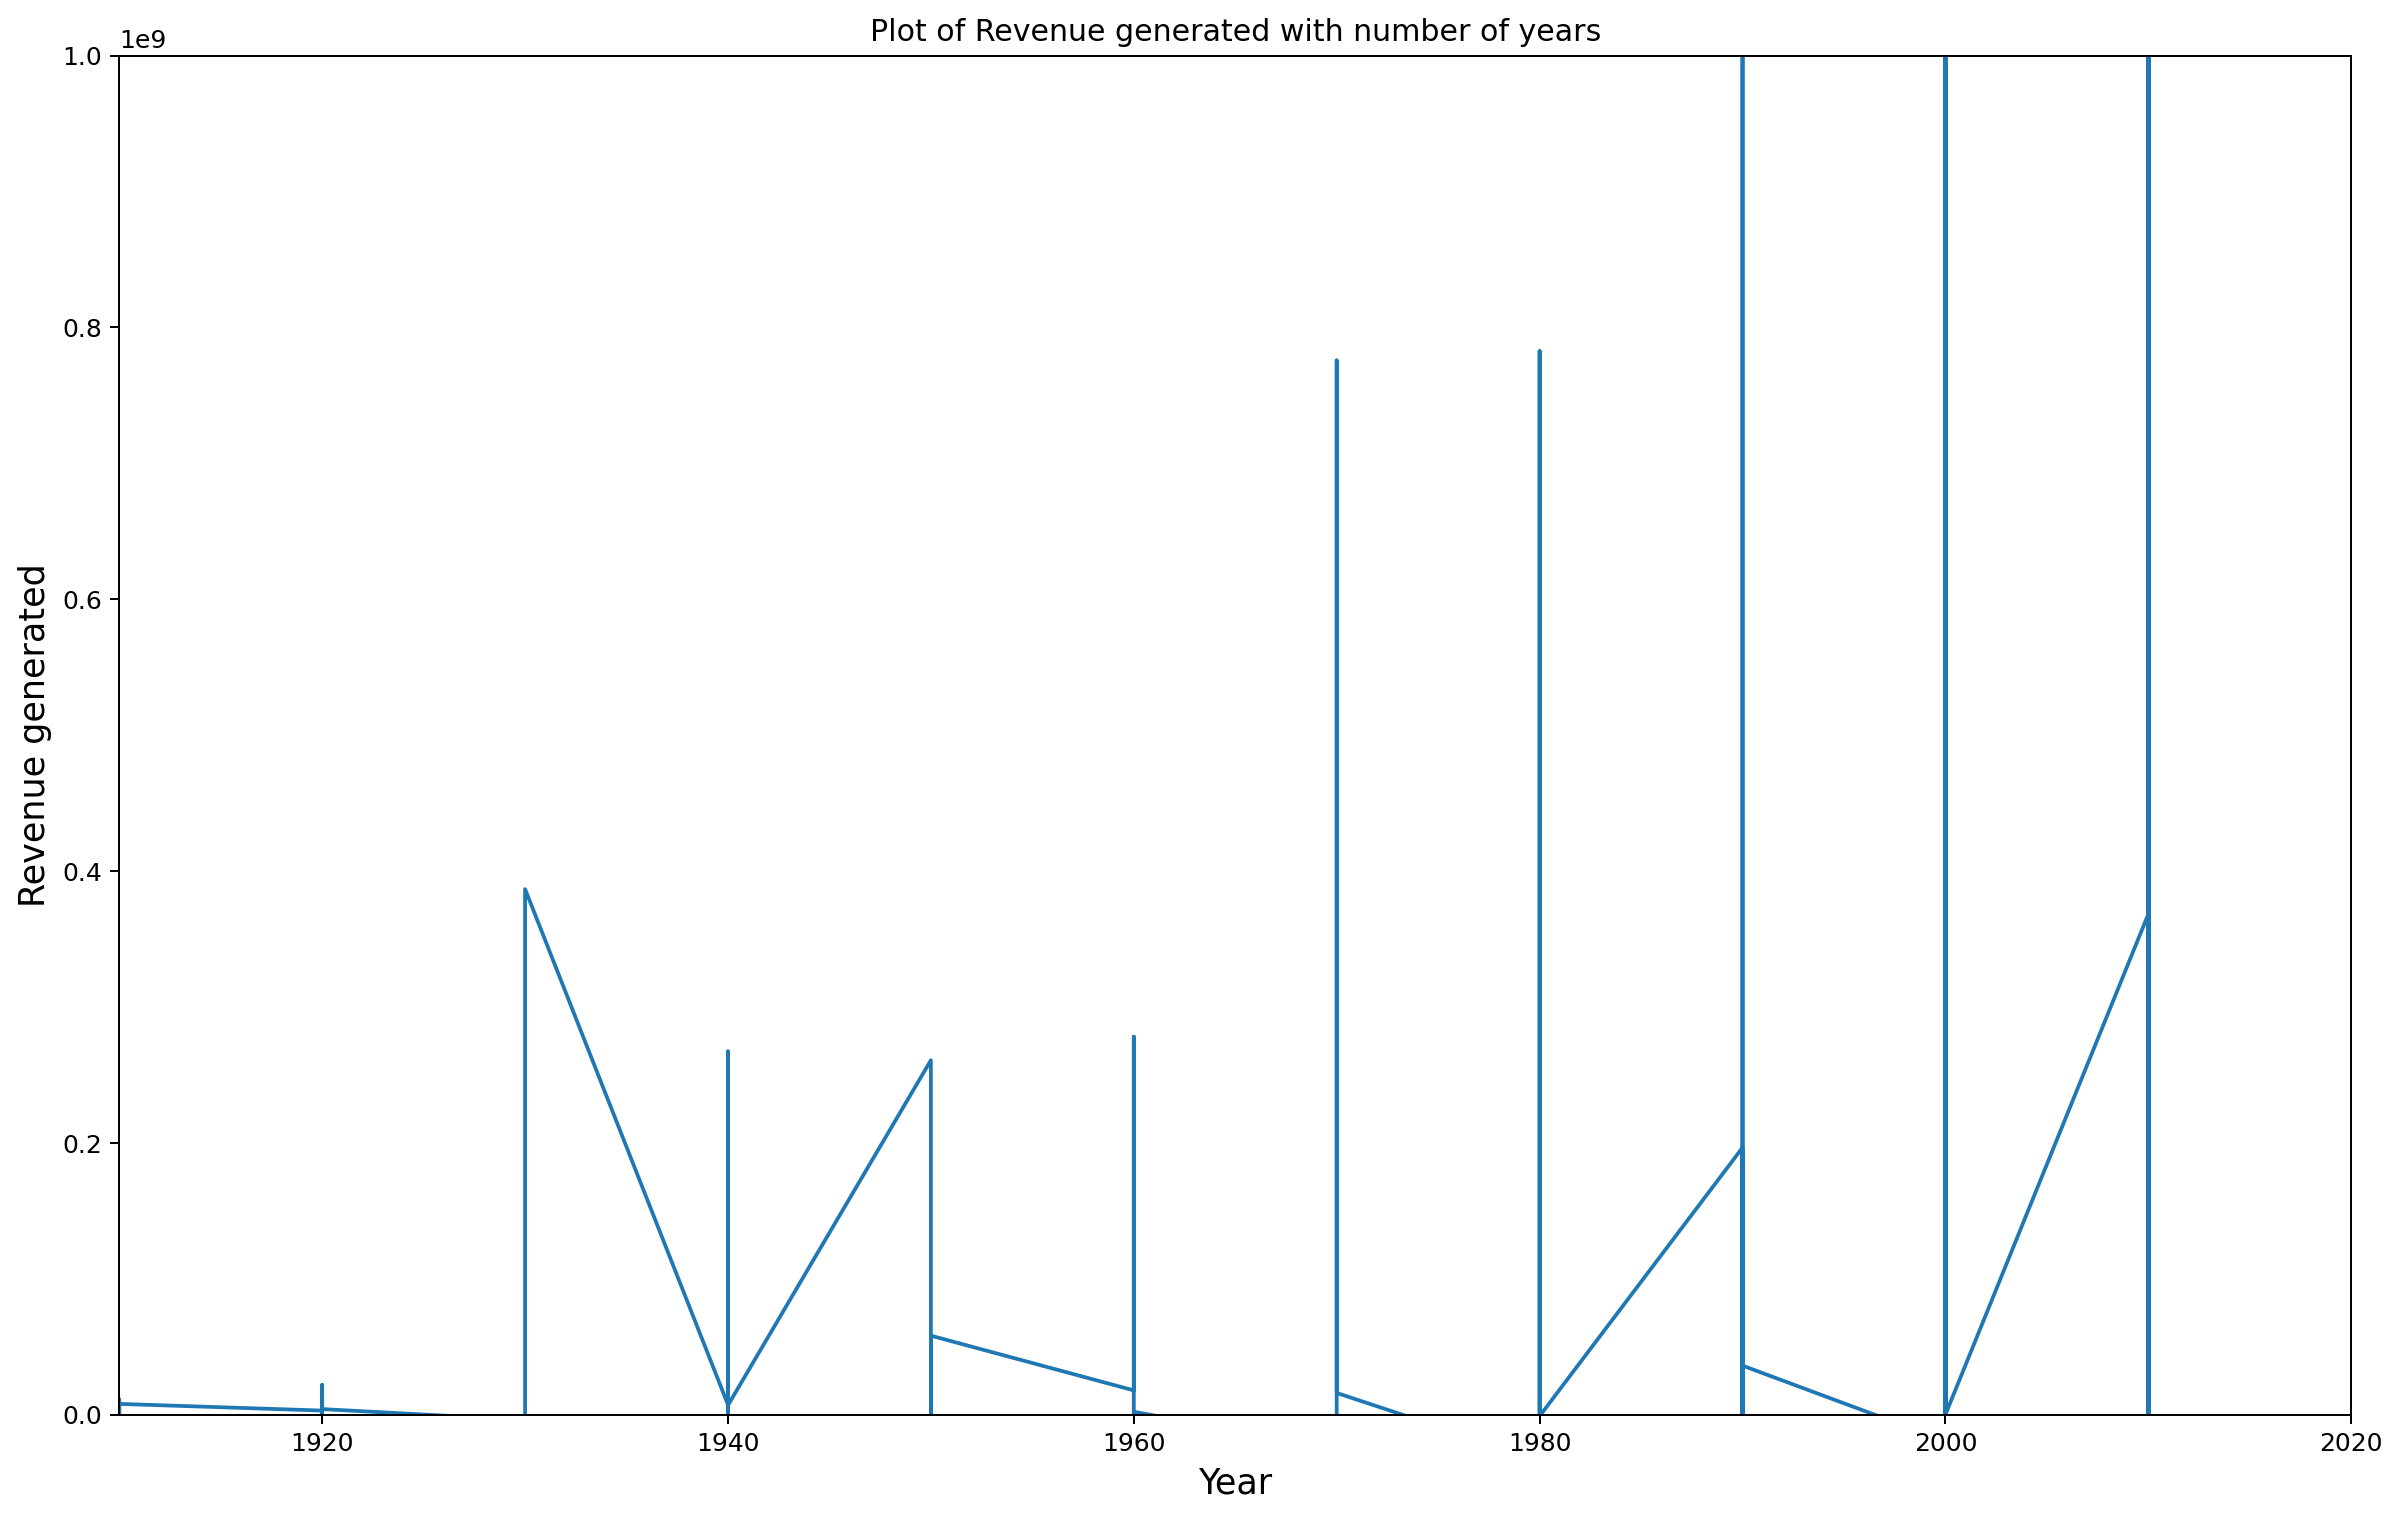

In [60]:
plt.figure(figsize=(16,10), dpi=180)

revenue = clean_data1["USD_Worldwide_Gross"] - clean_data1["USD_Production_Budget"] 

# insert revenue data into a new column called 'Revenue' 
#clean_data1.insert(7, "Revenue", revenue)

# make a plot of Decade in years and the revenue to the see the change in revenue with years
plt.plot(clean_data1["Decade"], revenue)

plt.xlim(1910,2020)
plt.ylim(0, 1000000000)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Revenue generated', fontsize=14)

plt.title("Plot of Revenue generated with number of years")
plt.show()

<p>The plot above shows that over the years that has been a significant in the revenue generated was the year progresses.</p>

In [61]:
clean_data1.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


<h1 align="center">Data Set 2</h1>

<h2>Description:</h2>
<p>Provisional Death counts of Diabetes, Coronavirus disease 2019 (COVID-2019) and other select causes of death by Month, sex and Age in the year 2020.</p>

<h1 align="center"> Questions </h1>

<ol>
    <li>Which sex group is more prone to die by Diabetes?</li>
    <li>Which age group is more prone to die by Diabetes?</li>
<ol>

In [62]:
# Read the data into pandas DataFrame
data_2 = pd.read_csv("AH_Provisional_Diabetes_Death_Counts_for_2020.csv")

### Check the fields (i.e. the column names) in the data set

In [63]:
# Get the number of fields
print(f"There are {len(data_2.columns)} fields/columns")
# Print the fields that we have
data_2.columns

There are 16 fields/columns


Index(['Data as of', 'Date_Of_Death_Year', 'Date_Of_Death_Month', 'AgeGroup',
       'Sex', 'COVID19', 'Diabetes.uc', 'Diabetes.mc', 'C19PlusDiabetes',
       'C19PlusHypertensiveDiseases', 'C19PlusMajorCardiovascularDiseases',
       'C19PlusHypertensiveDiseasesAndMCVD',
       'C19PlusChronicLowerRespiratoryDisease', 'C19PlusKidneyDisease',
       'C19PlusChronicLiverDiseaseAndCirrhosis', 'C19PlusObesity'],
      dtype='object')

### Fields and their descriptive name
<table>
    <thead>
        <tr>
            <td>Column Name</td>
            <td>Description</td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Data as of</td>
            <td>Date of death year</td>
        </tr>
        <tr>
            <td>Date_Of_Death_Year</td>
            <td>Date of death year</td>
        </tr>
        <tr>
            <td>Date_Of_Death_Month</td>
            <td>Date of death month</td>
        </tr>
        <tr>
            <td>AgeGroup</td>
            <td>Age group</td>
        </tr>
        <tr>
            <td>Sex</td>
            <td>Sex</td>
        </tr>
        <tr>
            <td>COVID19</td>
            <td>Deaths with COVID-19 (U071) as underlying or contributing cause</td>
        </tr>
        <tr>
            <td>Diabetes.uc</td>
            <td>Deaths with diabetes (E10-E14) as underlying cause</td>
        </tr>
        <tr>
            <td>Diabetes.mc</td>
            <td>Deaths with diabetes (E10-E14) as underlying or contributing cause</td>
        </tr>
        <tr>
            <td>C19PlusDiabetes</td>
            <td>Deaths with COVID-19 (U071) and diabetes (E10-E14)</td>
        </tr>
        <tr>
            <td>C19PlusHypertensiveDiseases</td>
            <td>Deaths with COVID-19 (U071 and hypertensive) disease (I10-I15)</td>
        </tr>
        <tr>
            <td>C19PlusHypertensiveDiseasesAndMCVD</td>
            <td>Deaths with COVID-19 (U071), hypertensive disease (I10-I15), and major cardiovascular diseases (I00-I78)</td>
        </tr>
        <tr>
            <td>C19PlusChronicLowerRespiratoryDisease</td>
            <td>Deaths with COVID-19 (U071) and chronic lower respiratory disease (J40-J47)</td>
        </tr>
        <tr>
            <td>C19PlusKidneyDisease</td>
            <td>Deaths with COVID-19 (U071) and Kidney disease (N00-N07,N17-N19, and N25-N27)</td>
        </tr>
        <tr>
            <td>C19PlusChronicLiverDiseaseAndCirrhosis</td>
            <td>Deaths with COVID-19 (U071) and chronic liver disease and cirrhosis (K70,K73-K74)</td>
        </tr>
        <tr>
            <td>C19PlusObesity</td>
            <td>Deaths with COVID-19 (U071) and obesity (E66)</td>
        </tr>
    </tbody>
    
    
</table>

In [64]:
# Print the first 5 rows of the data to have an overview
data_2.head()

,Data as of,Date_Of_Death_Year,Date_Of_Death_Month,AgeGroup,Sex,COVID19,Diabetes.uc,Diabetes.mc,C19PlusDiabetes,C19PlusHypertensiveDiseases,C19PlusMajorCardiovascularDiseases,C19PlusHypertensiveDiseasesAndMCVD,C19PlusChronicLowerRespiratoryDisease,C19PlusKidneyDisease,C19PlusChronicLiverDiseaseAndCirrhosis,C19PlusObesity
0,10/20/2020,2020,1,<18 years,Female (F),0,3,5,0,0,0,0,0,0,0,0
1,10/20/2020,2020,1,<18 years,Male (M),0,3,3,0,0,0,0,0,0,0,0
2,10/20/2020,2020,1,18-29 years,Female (F),0,20,36,0,0,0,0,0,0,0,0
3,10/20/2020,2020,1,18-29 years,Male (M),0,44,65,0,0,0,0,0,0,0,0
4,10/20/2020,2020,1,30-39 years,Female (F),0,53,104,0,0,0,0,0,0,0,0


In [65]:
# Basic Statistics
data_2.describe()

,Date_Of_Death_Year,Date_Of_Death_Month,COVID19,Diabetes.uc,Diabetes.mc,C19PlusDiabetes,C19PlusHypertensiveDiseases,C19PlusMajorCardiovascularDiseases,C19PlusHypertensiveDiseasesAndMCVD,C19PlusChronicLowerRespiratoryDisease,C19PlusKidneyDisease,C19PlusChronicLiverDiseaseAndCirrhosis,C19PlusObesity
count,226.00,226.00,226.00,226.00,226.00,226.00,226.00,226.00,226.00,226.00,226.00,226.00,226.00
mean,"2,020.00",4.96,"1,710.96",630.08,"2,306.33",280.80,373.80,796.71,796.71,146.96,150.07,13.92,58.74
std,0.00,2.58,"2,542.19",490.02,"1,939.94",367.53,563.60,"1,186.76","1,186.76",211.71,198.72,19.36,73.78
min,"2,020.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"2,020.00",3.00,3.00,78.25,163.50,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.25
50%,"2,020.00",5.00,503.00,699.50,"2,437.50",90.50,93.00,190.50,190.50,28.00,44.50,6.00,27.50
75%,"2,020.00",7.00,"2,624.00","1,071.00","3,880.00",478.00,568.75,"1,212.75","1,212.75",221.00,263.25,22.50,92.75
max,"2,020.00",9.00,"15,882.00","1,569.00","7,200.00","1,521.00","3,274.00","7,001.00","7,001.00","1,094.00",957.00,89.00,380.00


<h2> Question 1 </h2>
<p>Which sex group is more prone to die by Diabetes?</p>

In [66]:
# Get the number rows that has Male(M)
Number_of_male = data_2[data_2['Sex'] == 'Male (M)']
# Get the total number of Males involved
print(f"{len(Number_of_male)} males died of Diabetes in 2020")
# Get the number rows that has Male(M)
Number_of_female = data_2[data_2['Sex'] == 'Female (F)']
# Get the total number of Males involved
print(f"{len(Number_of_female)} females died of Diabetes in 2020")

114 males died of Diabetes in 2020
112 females died of Diabetes in 2020


<p>We can see that 114 males and 112 females died of diabetes and related disease in 2020.<p>
<p>This is pretty close, we can say that approximately equal number of male and female are prone to diabates</p>
<p>Both male and female are equally prone to Covid-19</p>

### Question 2
<p>Which age group is more prone to die by Diabetes</p>

In [67]:
# Get the different age group from the AgeGroup Column
pd.unique(data_2['AgeGroup'])

array(['<18 years', '18-29 years', '30-39 years', '40-49 years',
       '50-59 years', '50-64 years', '60-69 years', '65-74 years',
       '70-79 years', '75-84 years', '80+ years', '85+ years',
       'Unknown age', nan], dtype=object)

In [68]:
# Get the number of people involved.
num_less_than_18 = data_2[data_2['AgeGroup'] == '<18 years']
print(f"{len(num_less_than_18)} of people who died of Diabetes related disease are less than 18 years")

num_18_29 = data_2[data_2['AgeGroup'] == '18-29 years']
print(f"{len(num_18_29)} of people who died of Diabetes related disease are 18-29 years")

num_30_39 = data_2[data_2['AgeGroup'] == '30-39 years']
print(f"{len(num_30_39)} of people who died of Diabetes related disease are 30-39 years")

num_40_49 = data_2[data_2['AgeGroup'] == '40-49 years']
print(f"{len(num_40_49)} of people who died of Diabetes related disease are 40-49 years")

num_50_59 = data_2[data_2['AgeGroup'] == '50-59 years']
print(f"{len(num_50_59)} of people who died of Diabetes related disease are 50-59 years")

num_60_69 = data_2[data_2['AgeGroup'] == '60-69 years']
print(f"{len(num_60_69)} of people who died of Diabetes related disease are 60-69 years")

num_70_79 = data_2[data_2['AgeGroup'] == '70-79 years']
print(f"{len(num_50_59)} of people who died of Diabetes related disease are 70-79 years")

num_80_89 = data_2[data_2['AgeGroup'] == '80-89 years']
print(f"{len(num_80_89)} of people who died of Diabetes related disease are 80-89 years")

num_80_plus = data_2[data_2['AgeGroup'] == '80+ years']
print(f"{len(num_80_plus)} of people who died of Diabetes related disease are 80+ years")

num_85_plus = data_2[data_2['AgeGroup'] == '85+ years']
print(f"{len(num_85_plus)} of people who died of Diabetes related disease are 85+ years")

num_Unknown_age = data_2[data_2['AgeGroup'] == 'Unknown age']
print(f"{len(num_Unknown_age)} of people who died of Diabetes related disease are of Unknown age")

num_nan = data_2[data_2['AgeGroup'] == 'nan']
print(f"{len(num_nan)} of people who died of Diabetes related disease are nan")

18 of people who died of Diabetes related disease are less than 18 years
18 of people who died of Diabetes related disease are 18-29 years
18 of people who died of Diabetes related disease are 30-39 years
18 of people who died of Diabetes related disease are 40-49 years
18 of people who died of Diabetes related disease are 50-59 years
18 of people who died of Diabetes related disease are 60-69 years
18 of people who died of Diabetes related disease are 70-79 years
0 of people who died of Diabetes related disease are 80-89 years
18 of people who died of Diabetes related disease are 80+ years
18 of people who died of Diabetes related disease are 85+ years
9 of people who died of Diabetes related disease are of Unknown age
0 of people who died of Diabetes related disease are nan


<p>The statistics above shows that almost all the age groups have approximately equal likelihood of death to COVID-19</p>

<p>The above questions do not need a linear regression as they can be easily determined and answered from the basic statistics.</p>